In [9]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

(1, 2, 2, 1)


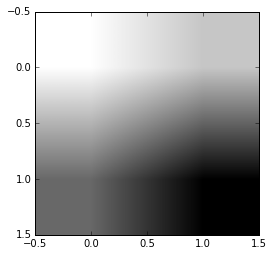

In [10]:
sess = tf.InteractiveSession()
image = np.array([[[[1],[2]],
                    [[3],[4]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(2,2), cmap='Greys')

# Convolution

('image:\n', array([[[[ 1.],
         [ 2.]],

        [[ 3.],
         [ 4.]]]], dtype=float32))
('weight.shape', TensorShape([Dimension(1), Dimension(1), Dimension(1), Dimension(2)]))
[[[[ 2.   0.5]
   [ 4.   1. ]]

  [[ 6.   1.5]
   [ 8.   2. ]]]]
(1, 2, 2, 2)
[[ 2.  4.]
 [ 6.  8.]]
[[ 0.5  1. ]
 [ 1.5  2. ]]


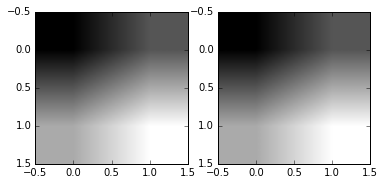

In [16]:
print("image:\n", image)
weight = tf.constant([[[[2., 0.5]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print conv2d_img
print conv2d_img.shape

conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')


# MaxPooling

In [17]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='VALID')
print(pool.shape)
print(pool.eval())

(1, 1, 1, 1)
[[[[ 4.]]]]


# MaxPooling : zeroPadding 

In [18]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='SAME')
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[ 4.]
   [ 3.]]

  [[ 2.]
   [ 1.]]]]


# MNIST example

In [22]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

IOError: [Errno socket error] [Errno -3] Temporary failure in name resolution

In [23]:
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img, cmap='gray')

NameError: name 'mnist' is not defined

In [24]:
sess = tf.InteractiveSession()

img = img.reshape(-1,28,28,1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01))
conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME')
print(conv2d)
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')

NameError: name 'img' is not defined

Tensor("MaxPool_2:0", shape=(1, 1, 1, 2), dtype=float32)


ValueError: cannot reshape array of size 1 into shape (7,7)

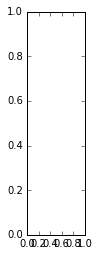

In [25]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[
                        1, 2, 2, 1], padding='SAME')
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')